# Exemple de réseau récurent par LSTM

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Function to generate a simple sequence dataset
def generate_time_series_data(num_samples, sequence_length=20):
    """
    Generate time series data with longer dependencies to showcase LSTM advantages.
    Each sequence contains a pattern where a value at the beginning influences the end.
    """
    # Generate sequences where the output depends on both recent and early values
    data = np.zeros((num_samples, sequence_length))
    for i in range(num_samples):
        # Starting values
        data[i, 0] = np.random.uniform(0, 1)
        data[i, 1] = np.random.uniform(0, 1)
        
        # Generate sequence with both short and long-term dependencies
        for j in range(2, sequence_length):
            if j < 10:
                # Short-term dependency (previous two values + noise)
                data[i, j] = 0.6 * data[i, j-1] + 0.3 * data[i, j-2] + np.random.normal(0, 0.05)
            else:
                # Add long-term dependency (influenced by early values + recent values)
                data[i, j] = 0.6 * data[i, j-1] + 0.2 * data[i, j-2] + 0.1 * data[i, 0] + 0.1 * data[i, 1] + np.random.normal(0, 0.05)
    
    # Create input sequences (all but last element) and target values (last element)
    X = data[:, :-1]
    y = data[:, -1]
    
    # Reshape X to be [samples, time steps, features]
    X = X.reshape(X.shape[0], X.shape[1], 1)
    
    return X, y

In [4]:
# Generate data
num_samples = 1000
sequence_length = 20
X_data, y_data = generate_time_series_data(num_samples, sequence_length)

# Split into training and testing sets
train_size = int(0.8 * num_samples)
X_train, X_test = X_data[:train_size], X_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

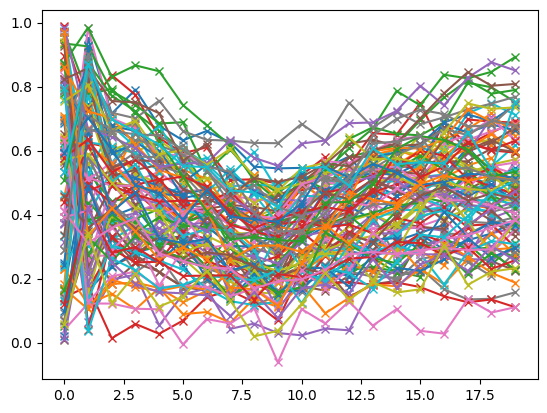

In [15]:
Xs = range(X_train.shape[1]+1)
for i in range(100):
    l = []
    for j in range(X_train.shape[1]):
        l.append(X_train[i][j][0])
    l.append(y_train[i])
    plt.plot(Xs, l,  '-x')


In [6]:
def create_lstm_model(units=32, input_shape=(19, 1)):
    """
    Create a simple LSTM model with one LSTM layer followed by a Dense output layer.
    """
    model = Sequential([
        LSTM(units,  activation='sigmoid', 
             recurrent_activation='sigmoid', name='lstm_layer'),
        Dense(1, name='output_layer')
    ])
    
    # Build the model
    model.build(input_shape=(None,) + input_shape)
    
    model.compile(optimizer='adam', loss='mse')
    return model

In [7]:

# Create and compile the model
lstm_model = create_lstm_model(20)

# Print model summary
print("LSTM Model architecture summary:")
lstm_model.summary()

LSTM Model architecture summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_layer (LSTM)               │ (None, 20)             │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,781 (6.96 KB)

 Trainable params: 1,781 (6.96 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the model
history = lstm_model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0893 - val_loss: 0.0423
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0403 - val_loss: 0.0381
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0359 - val_loss: 0.0357
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0341 - val_loss: 0.0339
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0322 - val_loss: 0.0319
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0304 - val_loss: 0.0300
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0285 - val_loss: 0.0280
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0266 - val_loss: 0.0260
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0246 - val_loss: 0.0240
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0226 - val_loss: 0.0219
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0207 - val_loss: 0.0199
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0187 - val_l

In [9]:
# Visualize training history
def plot_training_history(history):
    """
    Plot the training and validation loss during model training.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss During Training')
    plt.ylabel('Mean Squared Error')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
    # In a real application, you would save this figure
    print("In a real application, this would display a plot of training/validation loss")

# Making predictions and visualizing results
def visualize_predictions(model, X_test, y_test, num_examples=5):
    """
    Visualize predictions against actual values.
    """
    predictions = model.predict(X_test[:num_examples])
    
    print("\nLSTM Predictions vs Actual Values:")
    for i in range(num_examples):
        print(f"Example {i+1}:")
        print(f"Last 5 values in input sequence: {X_test[i, -5:, 0]}")
        print(f"First 2 values in input sequence: {X_test[i, 0:2, 0]}")
        print(f"Predicted value: {predictions[i][0]:.4f}")
        print(f"Actual value: {y_test[i]:.4f}")
        print(f"Error: {abs(predictions[i][0] - y_test[i]):.4f}")
        print("-" * 50)

In a real application, this would display a plot of training/validation loss


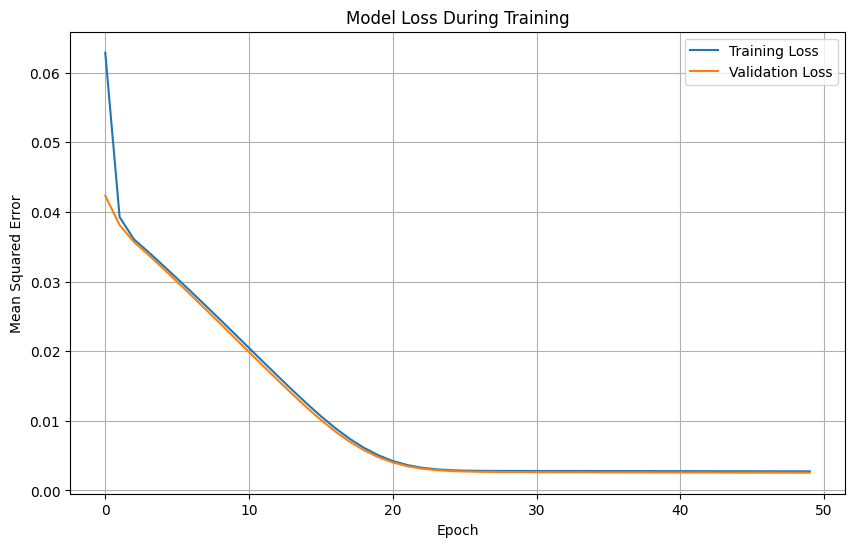

In [10]:
plot_training_history(history)

In [11]:
visualize_predictions(lstm_model, X_test, y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step

LSTM Predictions vs Actual Values:
Example 1:
Last 5 values in input sequence: [0.36424918 0.39155509 0.40307753 0.37345673 0.42284096]
First 2 values in input sequence: [0.35564843 0.43400002]
Predicted value: 0.4255
Actual value: 0.3375
Error: 0.0881
--------------------------------------------------
Example 2:
Last 5 values in input sequence: [0.40821474 0.42741601 0.40026945 0.38114808 0.51169165]
First 2 values in input sequence: [0.91740693 0.31647453]
Predicted value: 0.4876
Actual value: 0.5338
Error: 0.0462
--------------------------------------------------
Example 3:
Last 5 values in input sequence: [0.33465527 0.19461792 0.21041411 0.20534301 0.08874073]
First 2 values in input sequence: [0.0631492  0.59334366]
Predicted value: 0.1887
Actual value: 0.0902
Error: 0.0985
--------------------------------------------------
Example 4:
Last 5 values in input sequence: [0.7034505  0.74143006 0.78250156 0.73729911 0.80014994]
First 2 values in 

In [12]:
# Visualize LSTM gates (conceptual explanation)
def explain_lstm_gates():
    """
    Provide explanation of LSTM gates for educational purposes.
    """
    print("\n=== LSTM Gates Explanation for Educational Use ===")
    print("""
LSTM Architecture with Gates:

1. Forget Gate (f_t): Controls what information to throw away from the cell state.
   - Takes h_(t-1) and x_t as input
   - Outputs values between 0 (forget) and 1 (keep)
   - Formula: f_t = σ(W_f · [h_(t-1), x_t] + b_f)

2. Input Gate (i_t): Controls what new information to store in the cell state.
   - Two components:
     - i_t = σ(W_i · [h_(t-1), x_t] + b_i)
     - C̃_t = tanh(W_C · [h_(t-1), x_t] + b_C)
   - New cell state candidate values

3. Cell State Update:
   - Old state is multiplied by forget gate
   - Then add input gate * new candidate values
   - Formula: C_t = f_t * C_(t-1) + i_t * C̃_t

4. Output Gate (o_t): Controls what information to output based on cell state.
   - o_t = σ(W_o · [h_(t-1), x_t] + b_o)
   - h_t = o_t * tanh(C_t)

In TensorFlow, these operations are implemented internally in the LSTM layer.
The recurrent_activation parameter controls the activation for the gates (sigmoid),
while the activation parameter controls the output activation (tanh).
    """)

# Explain LSTM gates
explain_lstm_gates()



=== LSTM Gates Explanation for Educational Use ===

LSTM Architecture with Gates:

1. Forget Gate (f_t): Controls what information to throw away from the cell state.
   - Takes h_(t-1) and x_t as input
   - Outputs values between 0 (forget) and 1 (keep)
   - Formula: f_t = σ(W_f · [h_(t-1), x_t] + b_f)

2. Input Gate (i_t): Controls what new information to store in the cell state.
   - Two components:
     - i_t = σ(W_i · [h_(t-1), x_t] + b_i)
     - C̃_t = tanh(W_C · [h_(t-1), x_t] + b_C)
   - New cell state candidate values

3. Cell State Update:
   - Old state is multiplied by forget gate
   - Then add input gate * new candidate values
   - Formula: C_t = f_t * C_(t-1) + i_t * C̃_t

4. Output Gate (o_t): Controls what information to output based on cell state.
   - o_t = σ(W_o · [h_(t-1), x_t] + b_o)
   - h_t = o_t * tanh(C_t)

In TensorFlow, these operations are implemented internally in the LSTM layer.
The recurrent_activation parameter controls the activation for the gates (sigm

In [13]:

# Educational comparison of LSTM vs Simple RNN
def explain_lstm_advantages():
    """
    Explain the advantages of LSTM over simple RNN.
    """
    print("\n=== LSTM Advantages for Course Material ===")
    print("""
Why LSTM Outperforms Simple RNNs:

1. Vanishing Gradient Problem:
   - Simple RNNs struggle to learn long-term dependencies because gradients
     either vanish or explode during backpropagation through time.
   - LSTMs address this with the cell state (C_t) which acts as a highway for
     information flow across many time steps.

2. Selective Memory:
   - LSTMs can selectively remember or forget information through their gates.
   - The forget gate allows the network to discard irrelevant information.
   - The input gate controls what new information to incorporate.
   - The output gate determines what to output based on the cell state.

3. Practical Advantages:
   - Better performance on tasks requiring memory of events that happened many steps earlier
   - More stable training process
   - Better handling of variable-length sequences
   - State-of-the-art performance on many sequence modeling tasks before transformers

4. Computational Considerations:
   - LSTMs have more parameters than simple RNNs, making them more powerful but also
     more computationally expensive.
   - In our example with 32 units:
     - LSTM has 4,353 parameters
     - Simple RNN has 1,089 parameters

This example demonstrates how LSTM can capture both short-term patterns and
the long-term dependencies we built into our synthetic data.
    """)


In [14]:

explain_lstm_advantages()



=== LSTM Advantages for Course Material ===

Why LSTM Outperforms Simple RNNs:

1. Vanishing Gradient Problem:
   - Simple RNNs struggle to learn long-term dependencies because gradients
     either vanish or explode during backpropagation through time.
   - LSTMs address this with the cell state (C_t) which acts as a highway for
     information flow across many time steps.

2. Selective Memory:
   - LSTMs can selectively remember or forget information through their gates.
   - The forget gate allows the network to discard irrelevant information.
   - The input gate controls what new information to incorporate.
   - The output gate determines what to output based on the cell state.

3. Practical Advantages:
   - Better performance on tasks requiring memory of events that happened many steps earlier
   - More stable training process
   - Better handling of variable-length sequences
   - State-of-the-art performance on many sequence modeling tasks before transformers

4. Computational 